In [ ]:
# Start writing code here...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

In [ ]:
N = 10  # number of nodes
k = 1.5  # average connections per node
p = k / N
adj_matrix = bernoulli.rvs(p=0.15, size=(N,N))
adj_matrix

array([[1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

<AxesSubplot:>

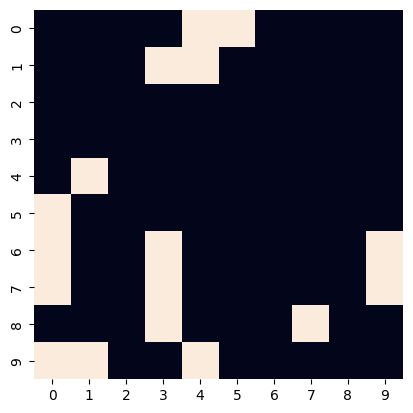

In [ ]:
np.fill_diagonal(adj_matrix, 0)
sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
# Adjacency list
adj_list = {ni: np.where(adj_matrix[ni])[0] for ni in range(N)}
adj_list

{0: array([4, 5]),
 1: array([3, 4]),
 2: array([], dtype=int64),
 3: array([], dtype=int64),
 4: array([1]),
 5: array([0]),
 6: array([0, 3, 9]),
 7: array([0, 3, 9]),
 8: array([3, 7]),
 9: array([0, 1, 4])}

In [ ]:
# Edges list
edge_list = [(ni, neighbor) for ni in range(N) for neighbor in adj_list[ni]]
edge_list

[(0, 4),
 (0, 5),
 (1, 3),
 (1, 4),
 (4, 1),
 (5, 0),
 (6, 0),
 (6, 3),
 (6, 9),
 (7, 0),
 (7, 3),
 (7, 9),
 (8, 3),
 (8, 7),
 (9, 0),
 (9, 1),
 (9, 4)]

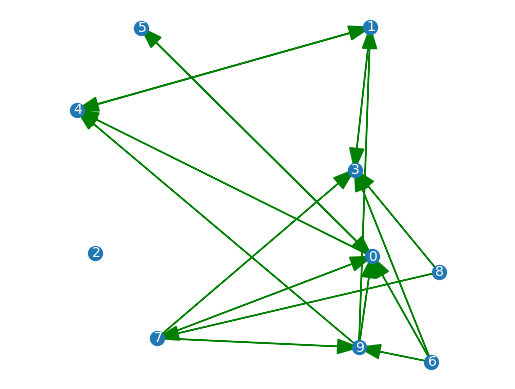

In [ ]:
def draw_arc(a, b, hw = 0.06):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )


              
a, b = -1, 1
x = np.random.random(size=N)*(b-a) + a
y = np.random.random(size=N)*(b-a) + a

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

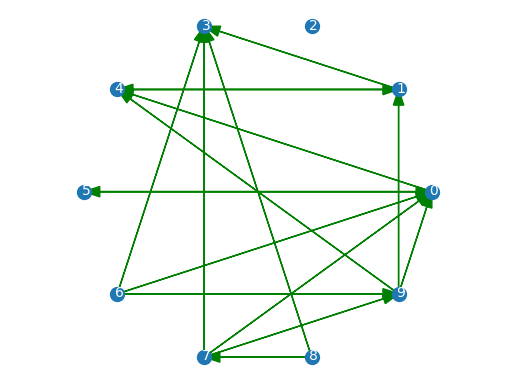

In [ ]:
x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Polar_to_cartesian.svg/1024px-Polar_to_cartesian.svg.png)

In [ ]:
x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

In [ ]:
N = 11
k = 10
C = []
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni-(ki+1), ni+(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N
C

array([[10,  1,  9,  2,  8,  3,  7,  4,  6,  5],
       [ 0,  2, 10,  3,  9,  4,  8,  5,  7,  6],
       [ 1,  3,  0,  4, 10,  5,  9,  6,  8,  7],
       [ 2,  4,  1,  5,  0,  6, 10,  7,  9,  8],
       [ 3,  5,  2,  6,  1,  7,  0,  8, 10,  9],
       [ 4,  6,  3,  7,  2,  8,  1,  9,  0, 10],
       [ 5,  7,  4,  8,  3,  9,  2, 10,  1,  0],
       [ 6,  8,  5,  9,  4, 10,  3,  0,  2,  1],
       [ 7,  9,  6, 10,  5,  0,  4,  1,  3,  2],
       [ 8, 10,  7,  0,  6,  1,  5,  2,  4,  3],
       [ 9,  0,  8,  1,  7,  2,  6,  3,  5,  4]])

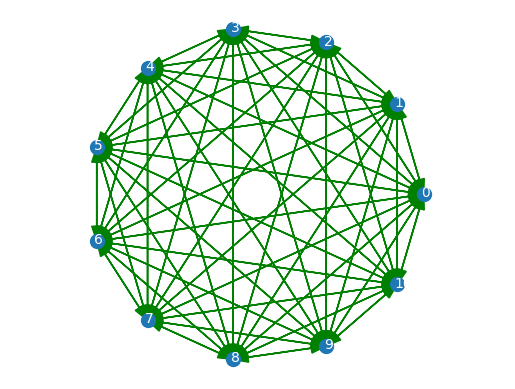

In [ ]:
edge_list =  [(ni, neighbor) for ni in range(N) for neighbor in C[ni]]

x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

<AxesSubplot:>

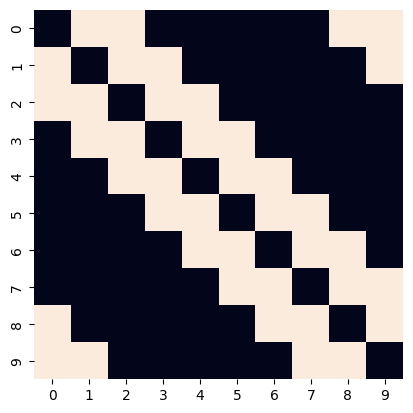

In [ ]:
adj_matrix = np.zeros((N,N))
for row in range(N):
    for col in C[row]:
        adj_matrix[row, col] = 1

sns.heatmap(adj_matrix, cbar=False, square=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>